<a href="https://colab.research.google.com/github/VeereshShringari/COVID-testing/blob/master/resnet5_keras_baseline_COVID_LFLImages_2Jun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ResNet50 Keras baseline model



In [0]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [1]:
import collections
from datetime import datetime
from math import ceil, floor
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import sys



import cv2
import tensorflow as tf
import keras


from keras_applications.resnet import ResNet50
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ShuffleSplit

from tensorflow.keras.applications import imagenet_utils
preprocess_input = imagenet_utils.preprocess_input

WEIGHTS_PATH = 'drive/My Drive/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


TEST_IMAGES_DIR = 'drive/My Drive/data/LFA_Iamges/Test/'
TRAIN_IMAGES_DIR = 'drive/My Drive/data/LFA_Iamges/Train/'
GENERATE_IMAGES_DIR = 'drive/My Drive/data/LFA_Iamges/General/'





Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
WEIGHTS_PATH

'drive/My Drive/resnet50_weights_tf_dim_ordering_tf_kernels.h5'

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [5]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16isnCyge5lJ3LZ6viAv8U6zOTpQ3QU2B9ikxoosLTZA')
sheet = wb.sheet1
data = sheet.get_all_values()
df_labels = pd.DataFrame(data)
#df_labels.drop(["reviewer", "Control_intensity","IgG_intensity", "IgM_intensity"],axis=1 )
cols = [1, 2,3, 4]
df_labels.drop(df_labels.columns[cols],axis=1,inplace=True)

df_labels.columns = df_labels.iloc[0]
df_labels = df_labels.iloc[1:]
df_labels['Assay_no.']=df_labels['Assay_no.'].astype(str).astype(int)
df_labels['Assay_no.'].dtypes
df_labels['Assay_no.'] = df_labels['Assay_no.'].apply(lambda x: '{0:0>4}'.format(x))
df_labels=df_labels.rename({'Assay_no.':'Labels'}, axis='columns')
df_labels.head(3)

,Labels,Result
1,0001,Positive
2,0002,Negative
3,0003,Negative


In [0]:

def convert_jpeg(list_name):

  for filename in list_name  :
    dst = filename.split('.')[0]+".jpg"
    os.rename(list_name, dst)

In [0]:
My_list  = ["test/try.jpeg", "team/found.jpg"]
convert_jpeg(My_list)

 test/try.jpg
 team/found.jpg


In [0]:
import IPython.display as display
from PIL import Image
import pathlib
from os import path


data_dir = pathlib.Path(".")

images = list(data_dir.glob('drive/My Drive/data/LFA_Iamges/Train/*.jpg'))


test=[]

i=0 
for image_path in images:
    image_name= path.basename(image_path).split('.')[0]
    image_name = str(image_name)
    i+=1
    print('actual',df_labels.Labels[k])
    print('derived',image_name)
    for  k in range(len(df_labels)) : 
        k=+1
        if ( image_name == df_labels.Labels[k]):
            print('actual',df_labels.Labels[k])
            print('derived',image_name)
            test.append(
                {
                    'Labels': image_name,
                    'Result': df_labels.Result[k]
                    
                }
              )
   #print(df_labels.Result[i])

test=pd.DataFrame(test)
test.head(3)
#file_sep
# if (df.Assay_no == image_path)

actual 0047
derived 0047
actual 0001
derived 0004
actual 0001
derived 0039
actual 0001
derived 0048
actual 0001
derived 0034
actual 0001
derived 0035
actual 0001
derived 0045
actual 0001
derived 0036
actual 0001
derived 0030
actual 0001
derived 0031
actual 0001
derived 0028
actual 0001
derived 0040
actual 0001
derived 0008
actual 0001
derived 0027
actual 0001
derived 0007
actual 0001
derived 0024
actual 0001
derived 0013
actual 0001
derived 0015
actual 0001
derived 0005
actual 0001
derived 0022
actual 0001
derived 0019
actual 0001
derived 0012
actual 0001
derived 0002
actual 0001
derived 0003
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001
actual 0001
derived 0001


,Labels,Result
0,0001,Positive
1,0001,Positive
2,0001,Positive
3,0001,Positive
4,0001,Positive
5,0001,Positive
6,0001,Positive
7,0001,Positive
8,0001,Positive
9,0001,Positive


In [0]:
# Taylor Suggested code 



data_dir = pathlib.Path(".")

images = list(data_dir.glob('drive/My Drive/data/LFA_Iamges/Train/*.jpg'))



test=pd.DataFrame({'names': [], 'Results': []})

i=0 
for image_path in images:
    image_name= path.basename(image_path).split('.')[0]
    image_name = str(image_name)
    i+=1
    print('actual',df_labels.Labels[k])
    print('derived',image_name)
    if (df_labels['Labels'] == image_name).sum() == 1:
        test = test.append(
            pd.DataFrame({
                'names': image_name,
                'Results':  df_labels['Result']
            })
        )
   #print(df_labels.Result[i])

test=pd.DataFrame(test)
test.head(3)
#file_sep
# if (df.Assay_no == image_path)

actual 0001
derived 0047
actual 0001
derived 0004
actual 0001
derived 0039
actual 0001
derived 0048
actual 0001
derived 0034
actual 0001
derived 0035
actual 0001
derived 0045
actual 0001
derived 0036
actual 0001
derived 0030
actual 0001
derived 0031
actual 0001
derived 0028
actual 0001
derived 0040
actual 0001
derived 0008
actual 0001
derived 0027
actual 0001
derived 0007
actual 0001
derived 0024
actual 0001
derived 0013
actual 0001
derived 0015
actual 0001
derived 0005
actual 0001
derived 0022
actual 0001
derived 0019
actual 0001
derived 0012
actual 0001
derived 0002
actual 0001
derived 0003
actual 0001
derived 0001
actual 0001
derived 0011
actual 0001
derived 0010
actual 0001
derived 0014
actual 0001
derived 0021
actual 0001
derived 0020
actual 0001
derived 0025
actual 0001
derived 0018
actual 0001
derived 0009
actual 0001
derived 0023
actual 0001
derived 0017
actual 0001
derived 0016
actual 0001
derived 0006
actual 0001
derived 0026
actual 0001
derived 0043
actual 0001
derived 0029


,names,Results
1,0047,Positive
2,0047,Negative
3,0047,Negative
4,0047,Negative
5,0047,Negative
6,0047,Positive
7,0047,Negative
8,0047,Negative
9,0047,Positive
10,0047,Positive


drive/My Drive/data/LFA_Iamges/Train/0047.jpg
drive/My Drive/data/LFA_Iamges/Train/0004.jpg
drive/My Drive/data/LFA_Iamges/Train/0039.jpg
drive/My Drive/data/LFA_Iamges/Train/0048.jpg
drive/My Drive/data/LFA_Iamges/Train/0034.jpg
drive/My Drive/data/LFA_Iamges/Train/0035.jpg
drive/My Drive/data/LFA_Iamges/Train/0045.jpg
drive/My Drive/data/LFA_Iamges/Train/0036.jpg
drive/My Drive/data/LFA_Iamges/Train/0030.jpg
drive/My Drive/data/LFA_Iamges/Train/0031.jpg
drive/My Drive/data/LFA_Iamges/Train/0028.jpg
drive/My Drive/data/LFA_Iamges/Train/0040.jpg
drive/My Drive/data/LFA_Iamges/Train/0008.jpg
drive/My Drive/data/LFA_Iamges/Train/0027.jpg
drive/My Drive/data/LFA_Iamges/Train/0007.jpg
drive/My Drive/data/LFA_Iamges/Train/0024.jpg
drive/My Drive/data/LFA_Iamges/Train/0013.jpg
drive/My Drive/data/LFA_Iamges/Train/0015.jpg
drive/My Drive/data/LFA_Iamges/Train/0005.jpg
drive/My Drive/data/LFA_Iamges/Train/0022.jpg
drive/My Drive/data/LFA_Iamges/Train/0019.jpg
drive/My Drive/data/LFA_Iamges/Tra

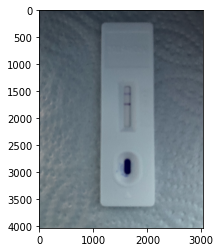

In [0]:
import IPython.display as display
from PIL import Image
import pathlib


data_dir = pathlib.Path(".")

images = list(data_dir.glob('drive/My Drive/data/LFA_Iamges/Train/*.jpg'))
#images_path+=list(data_dir.glob('drive/My Drive/data/LFA_Iamges/Images/*.jpeg'))

#convert_jpeg(images_path)

#https://medium.com/my-world-with-python/how-to-rename-multiple-files-or-data-sets-which-is-in-google-drive-using-python-af6233849ee7

new_width = 3000
new_height = 1000
for image_path in images:
    print(image_path)
    im = cv2.imread(str(image_path))
    #display.display(im)
    width, height,_ = im.shape   # Get dimensions
    if width < height:
      M = cv2.getRotationMatrix2D((height/2,width/2),90,1)
      im = cv2.warpAffine(im,M,(height,width))
    #plt.imshow(im.astype('uint8'))
plt.show()


In [0]:
im.shape

(4032, 3024, 3)

In [6]:
from keras.utils import to_categorical
df_labels["Result"] = df_labels["Result"].astype('category')
df_labels["Result"] = df_labels["Result"].cat.codes
#df_labels["Result"] = df_labels["Result"].astype('int')
decoy=df_labels["Result"].to_numpy()
Labels = to_categorical(decoy)
Labels= np.array(Labels)
#Labels  = np.expand_dims(Labels , axis=0)

Labels.shape
#cats['images'] = np.array(encoded.shape)
#cats['labels'] = np.array(cats['labels'])

(48, 2)

In [7]:
import IPython.display as display
from PIL import Image
import pathlib
data_dir = pathlib.Path(".")

images = list(data_dir.glob('drive/My Drive/data/LFA_Iamges/Train/*.jpg'))
desired_size=(224,224, 3)
for k, image_path in enumerate (images):
    im = cv2.imread(str(image_path))
        #display.display(im)
    width, height,_ = im.shape   # Get dimensions
    res = cv2.resize(im, dsize=desired_size[:2], interpolation=cv2.INTER_CUBIC)
    image = img_to_array(res)
    image = np.expand_dims(image, axis=0)
    if k == 0 : 
      image2 = image 
    else : 
      image2= np.concatenate([image2,image])

image2.shape

(48, 224, 224, 3)

In [0]:
aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
total = 0
sum_total=1





NameError: ignored

In [16]:
d.shape


(15, 2)

SyntaxError: ignored

,Labels,Result
1,0001,1
2,0002,0
3,0003,0


In [0]:
data_dir = pathlib.Path(".")

images = list(data_dir.glob('drive/My Drive/data/LFA_Iamges/General/*.jpg'))
test=[]
i=0 
for image_path in images:
    image_name= path.basename(image_path).split('&')[1].split('_')[0]

    image_name = str(image_name)
    i+=1
    for  k in range(len(df_labels)) : 
        if (df_labels.Result[k] == image_name):
          test.append(
              {
                  'Labels': image_name,
                  'Result': df_labels.Result[k]
                  
              }
            )
   #print(df_labels.Result[i])

test=pd.DataFrame(test)
test.head(39)

KeyError: ignored

### 1. Helper functions

* normalizing the pixel values between -1 and 1 
* read and transform dcms to 3-channel inputs for e.g. ResNet50.

\* Source for windowing (although now partly removed from this kernel): https://www.kaggle.com/omission/eda-view-dicom-images-with-correct-windowing

In [0]:
def _normalize(img):
    if img.max() == img.min():
        return np.zeros(img.shape)-1
    return 2 * (img - img.min())/(img.max() - img.min()) - 1


  
def _read(path, desired_size, augment_data=0, plot=False):
    """Will be used in DataGenerator
    Loads image, crops and resizes. With optional image data augmentation.
    We assume that the image has been centered. 
    Input:
    ----------------------------------
    desired_size     :  desired size for the image (tuple)
    augment_data     :  nb of data augmented samples (int)
    """
    new_width, new_height,_ = desired_size
    print (path)
    img = cv2.imread(path)
    rows, cols,_ = img.shape
   
    if rows < cols:  
      M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
      img = cv2.warpAffine(img,M,(cols,rows))
    res = cv2.resize(img, dsize=desired_size[:2], interpolation=cv2.INTER_CUBIC)
    samples = np.expand_dims(res, 0)
    if augment_data>0:
        # create image data augmentation generator
        datagen = ImageDataGenerator(rotation_range=90)
        # prepare iterator
        it = datagen.flow(samples, batch_size=1)
      
        batch = it.next()    # generate batch of images
        samples = batch
        if plot:
           plt.subplot(330 + 1)
           plt.imshow(batch[0].astype('uint8'))
          #img = np.stack((res,)*3, axis=-1)
    if plot: plt.show()
    #print('samples size in read:', samples.shape)
    return samples


drive/My Drive/data/LFA_Iamges/Train/0042.jpg


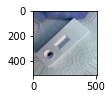

(1, 512, 512, 3)


In [29]:
test = _read('drive/My Drive/data/LFA_Iamges/Train/0042.jpg',(512,512,3),9, plot=True)
print(test.shape)
#imageGen, Y  = aug.flow( image,Labels, batch_size=1, save_to_dir=GENERATE_IMAGES_DIR,save_prefix="image_gen_neo&", save_format=".jpg")

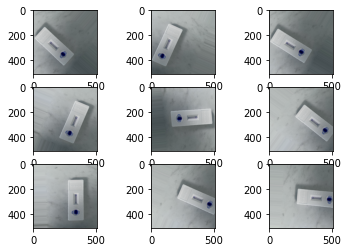

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy as sc

img = cv2.imread('drive/My Drive/data/LFA_Iamges/Train/0021.jpg')
# convert to numpy array
res = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
data = res
# expand dimension to one sample

samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range = 90, width_shift_range=[-100,100])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### 2. Data generators

Inherits from keras.utils.Sequence object and thus should be safe for multiprocessing.


In [0]:


class DataGenerator(keras.utils.Sequence):
    def __init__(self, list_IDs, img_labels, batch_size=1, img_size=(512, 512,3), 
                 img_dir=TRAIN_IMAGES_DIR, n_classes = 6, train =True,
                 n_augment = 9, shuffle=True,
                 *args, **kwargs):

        self.list_IDs = list_IDs
        self.indices = np.arange(len(self.list_IDs))
        self.img_labels = img_labels ### contains col1: names of images for loading + col2(!exits fr test) for labels
        self.n_classes = n_classes   ### nb of classes
        self.n_augment = n_augment   ### nb of additional data samples
        self.batch_size = batch_size
        self.img_size = img_size    ###  desired image size: (width, height, n_channels)
        self.img_dir = img_dir
        self.shuffle = shuffle
        self.train = train
        self.on_epoch_end()

    def __len__(self):
        return int(ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size: (index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indices]
        if self.train:
            X, Y = self.__data_generation(list_IDs_temp)
            return X, Y
        else:
            X = self.__data_generation(list_IDs_temp)
            return X
        
    def on_epoch_end(self):
        self.indices = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indices)

    def __data_generation(self, list_IDs_temp):
        print("Self image size",self.img_size )
        if ( self.train==True ):
              X = np.empty((self.batch_size , self.img_size))
              d = []
              it =0
              for image_gen , Y in  aug.flow( image2,Labels, batch_size=self.batch_size, save_to_dir=GENERATE_IMAGES_DIR,save_prefix="image_gen_neo&", save_format=".jpg") :
                  it+=1
                  if it==1: 
                    d = Y 
                    image_aug = image_gen
                  else:
                   break  
        
        if self.train: # training phase
            Y = np.zeros((self.batch_size , self.n_classes),
                          dtype=np.float32)
            
        
            for i, ID in enumerate(list_IDs_temp):
              test = _read(self.img_dir+self.img_labels['ID'].loc[ID] +".jpg",
                              self.img_size,  augment_data= self.n_augment, plot=False)
              print("Dim data gen",  test.shape)
              X[i:(i +self.n_augment + 1),] = test
              ### Convert label  into one hot vector
              Y[i:(i +self.n_augment + 1), int(self.img_labels['label'].loc[ID])] = 1

            return X, Y
        
        else: # test phase
            for i, ID in enumerate(list_IDs_temp):
                X[i,] = _read(self.img_dir+self.img_labels['ID'].loc[ID] +".jpg",
                              self.img_size, augment_data=0, plot=False)      
            return X

### 3a. loss function and metric

In [0]:
from keras import backend as K

def weighted_log_loss(y_true, y_pred):
    """
    Can be used as the loss function in model.compile()
    ---------------------------------------------------
    """
    
    class_weights = np.array([1., 2., 2., 2.])
    
    eps = K.epsilon()
    
    y_pred = K.clip(y_pred, eps, 1.0-eps)

    out = -(         y_true  * K.log(      y_pred) * class_weights
            + (1.0 - y_true) * K.log(1.0 - y_pred) * class_weights)
    
    return K.mean(out, axis=-1)


def _normalized_weighted_average(arr, weights=None):
    """
    A simple Keras implementation that mimics that of 
    numpy.average(), specifically for the this competition
    """
    
    if weights is not None:
        scl = K.sum(weights)
        weights = K.expand_dims(weights, axis=1)
        return K.sum(K.dot(arr, weights), axis=1) / scl
    return K.mean(arr, axis=1)


def weighted_loss(y_true, y_pred):
    """
    Will be used as the metric in model.compile()
    ---------------------------------------------
    
    Similar to the custom loss function 'weighted_log_loss()' above
    but with normalized weights, which should be very similar 
    to the official competition metric:
        https://www.kaggle.com/kambarakun/lb-probe-weights-n-of-positives-scoring
    and hence:
        sklearn.metrics.log_loss with sample weights
    """
    
    class_weights = K.variable([1., 2., 2., 2.])
    
    eps = K.epsilon()
    
    y_pred = K.clip(y_pred, eps, 1.0-eps)

    loss = -(        y_true  * K.log(      y_pred)
            + (1.0 - y_true) * K.log(1.0 - y_pred))
    
    loss_samples = _normalized_weighted_average(loss, class_weights)
    
    return K.mean(loss_samples)


def weighted_log_loss_metric(trues, preds):
    """
    Will be used to calculate the log loss 
    of the validation set in PredictionCheckpoint()
    ------------------------------------------
    """
    class_weights = [1., 2., 2., 2.]
    
    epsilon = 1e-7
    
    preds = np.clip(preds, epsilon, 1-epsilon)
    loss = trues * np.log(preds) + (1 - trues) * np.log(1 - preds)
    loss_samples = np.average(loss, axis=1, weights=class_weights)

    return - loss_samples.mean()

def sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1):
    return K.sparse_categorical_crossentropy(
        y_true, y_pred, from_logits=from_logits, axis=axis)

### 3b. Model

Model is divided into three parts: <br> 

* (REMOVED) The initial layer, which will transform/map input image of shape (\_, \_, 1) to another "image" of shape (\_, \_, 3).

* The new input image is then passed through ResNet50 (which I named "engine"). ResNet50 could be replaced by any of the available architectures in keras_application.

* Finally, the output from ResNet50 goes through average pooling followed by a dense output layer.

In [0]:
input_dims=(224,224, 3)
input_dims[:2]

(224, 224)

In [0]:
class PredictionCheckpoint(keras.callbacks.Callback):
    
    def __init__(self, test_df, valid_df, n_classes =5,
                 test_images_dir=TEST_IMAGES_DIR, 
                 valid_images_dir=TRAIN_IMAGES_DIR, 
                 batch_size=32, input_size=(224, 224, 3)):
        
        self.test_df = test_df
        self.valid_df = valid_df
        self.test_images_dir = test_images_dir
        self.valid_images_dir = valid_images_dir
        self.batch_size = batch_size
        self.input_size = input_size
        self.n_classes = n_classes
        
        
    def on_train_begin(self, logs={}):
        self.test_predictions = []
        self.valid_predictions = []
        
    def on_epoch_end(self,batch, logs={}):
        self.test_predictions.append(
            self.model.predict_generator(
                DataGenerator(self.test_df.index, test_df,
                              batch_size=self.batch_size, img_size=self.input_size, 
                              img_dir=self.test_images_dir, n_classes = self.n_classes,
                              train =False, n_augment = 0, shuffle=True),
                verbose=2)[:len(self.test_df)])
        
        self.valid_predictions.append(
            self.model.predict_generator(
                DataGenerator(self.valid_df.index, valid_df,
                              batch_size=self.batch_size, img_size=self.input_size, 
                              img_dir=self.valid_images_dir, n_classes = self.n_classes,
                              train =False, n_augment = 0, shuffle=True),
                verbose=2)[:len(self.valid_df)])
        valid_labels = np.zeros((self.valid_df.shape[0], self.n_classes))
        valid_labels[np.arange(self.valid_df.shape[0]), self.valid_df['label']] = 1
        print('valid_labels', valid_labels )
        print('pred_labels', self.valid_predictions)
        print("validation loss: %.4f" %
              weighted_log_loss_metric(valid_labels, 
                                   np.average(self.valid_predictions, axis=0)))
        
        # here you could save the predictions with np.save()


class MyDeepModel:
    
    def __init__(self, engine, input_dims, batch_size=5, num_epochs=4,
                 n_classes=4, learning_rate=1e-3, n_augment = 9,
                 decay_rate=1.0, decay_steps=1, weights=WEIGHTS_PATH_NO_TOP, verbose=1):
        
        self.engine = engine
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.n_classes = n_classes
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        self.n_augment = n_augment
        self.weights = weights
        self.verbose = verbose
        self._build()

    def _build(self):
        self.engine.trainable = True
        
      
    
        engine = self.engine(include_top=False,
                             weights=self.weights, input_shape=(*self.input_dims[:2], 3),
                             backend = keras.backend, layers = keras.layers, 
                             models = keras.models, utils = keras.utils,)
        set_trainable = False
        for layer in engine.layers:
            if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
              set_trainable = True
            if set_trainable:
              layer.trainable = True
            else:
              layer.trainable = False
        x = keras.layers.GlobalAveragePooling2D(name='avg_pool')(engine.output)
        out = keras.layers.Dense(self.n_classes, activation="sigmoid", name='dense_output')(x)

        self.model = keras.models.Model(inputs=engine.input, outputs=out)
        # loss function has been changed needs to be investigated.
        self.model.compile(loss='categorical_crossentropy',
                           optimizer=keras.optimizers.Adam(0.0),
                           metrics=[keras.metrics.Precision(), keras.metrics.Recall()])
    #https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras

    def fit_and_predict(self, train_df, valid_df, test_df):
        
        # callbacks
        pred_history = PredictionCheckpoint(test_df, valid_df,
                                            n_classes=self.n_classes,
                                            batch_size=self.batch_size,
                                            input_size=self.input_dims)
        checkpointer = keras.callbacks.ModelCheckpoint(filepath='%s-{epoch:02d}.hdf5' % self.engine.__name__, verbose=1, save_weights_only=True, save_best_only=False)
        scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: self.learning_rate * pow(self.decay_rate, floor(epoch / self.decay_steps)))
        self.model.fit_generator(
            DataGenerator(
                list_IDs = train_df.index, 
                img_labels = train_df,
                batch_size=self.batch_size,
                img_size=self.input_dims,
                img_dir=TRAIN_IMAGES_DIR,
                n_classes = self.n_classes,
                train=True,
                n_augment = self.n_augment,
                shuffle = True
            ),
            epochs=self.num_epochs,
            verbose=self.verbose,
            use_multiprocessing=True,
            workers=4#,
            #callbacks=[history]
            #callbacks=[tensorboard_callback]
        )
        
        return pred_history

     


    
    def save(self, path):
        self.model.save_weights(path)
    
    def load(self, path):
        self.model.load_weights(path)

In [0]:
WEIGHTS_PATH_NO_TOP

'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

### 4. Read csv files


In [0]:
def read_testset(filename="drive/My Drive/data/classification_labels.txt"):
    ''' 
    Data in data folder
    '''
    wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1SoFbAYTInDf3eU7zBVJydmqUzgqFZ35-XL6Vk7pNAQk')
    sheet = wb.sheet1
    data = sheet.get_all_values()
    df = pd.DataFrame(data)
    cols = [1, 2,3, 4]
    df.drop(df.columns[cols],axis=1,inplace=True)
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df['Assay_no.']=df['Assay_no.'].astype(str).astype(int)
    #df['Assay_no.'].dtypes
    df['Assay_no.'] = df['Assay_no.'].apply(lambda x: '{0:0>4}'.format(x))
    df['Assay_no.']= df['Assay_no.'].astype(str)
    df["Result"] = df["Result"].astype('category')
    df["Result"] = df["Result"].cat.codes
    df["Result"] = df["Result"].astype('int')
    #df = pd.read_csv(filename, sep=" ", header=None)
    df.rename(columns={'Assay_no.': 'ID', 'Result': 'label'})
    df.columns = ["ID", "label"]
    return df

def read_trainset(filename="drive/My Drive/data/classification_labels.txt"):
    ''' 
    Data in data folder
    '''
    wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16isnCyge5lJ3LZ6viAv8U6zOTpQ3QU2B9ikxoosLTZA')
    sheet = wb.sheet1
    data = sheet.get_all_values()
    df = pd.DataFrame(data)
    cols = [1, 2,3, 4]
    df.drop(df.columns[cols],axis=1,inplace=True)
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df['Assay_no.']=df['Assay_no.'].astype(str).astype(int)
    #df['Assay_no.'].dtypes
    df['Assay_no.'] = df['Assay_no.'].apply(lambda x: '{0:0>4}'.format(x))
    df['Assay_no.']= df['Assay_no.'].astype(str)
    #df = pd.read_csv(filename, sep=" ", header=None)
    df["Result"] = df["Result"].astype('category')
    df["Result"] = df["Result"].cat.codes
    df["Result"] = df["Result"].astype('int')
    df.rename(columns={'Assay_no.': 'ID', 'Result': 'label'})
    df.columns = ["ID", "label"]
    return df

    
test_df = read_testset()
df = read_trainset()

In [0]:

test_df["ID"].dtype

dtype('O')

In [0]:
test_df.head(3)

,ID,label
1,0049,0
2,0050,0
3,0051,1


### 5. Train model and predict

*Using train, validation and test set* <br>

Training for 6 epochs with Adam optimizer, with a learning rate of 0.0005 and decay rate of 0.8. The validation predictions are \[exponentially weighted\] averaged over all 6 epochs (same goes for the test set submission later). `fit_and_predict` returns validation and test predictions for all epochs.


In [0]:
# train set (80%) and validation set (20%)
ss = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42).split(df.index)

# lets go for the first fold only
train_idx, valid_idx = next(ss)

# obtain model
model = MyDeepModel(engine=ResNet50, input_dims=(224,224, 3),
                    batch_size=10, learning_rate=5e-5, n_classes=2,n_augment=0,
                    num_epochs=1, decay_rate=0.6, decay_steps=1,
                    weights='imagenet', verbose=2)

# obtain test + validation predictions (history.test_predictions, history.valid_predictions)
history = model.fit_and_predict(df.iloc[train_idx], df.iloc[valid_idx], test_df)


Epoch 1/1
Self image size (224, 224, 3)
Epoch 1/1
Self image size (224, 224, 3)
Self image size (224, 224, 3)
Self image size (224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0039.jpg
drive/My Drive/data/LFA_Iamges/Train/0001.jpg
drive/My Drive/data/LFA_Iamges/Train/0008.jpg
drive/My Drive/data/LFA_Iamges/Train/0043.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0005.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0022.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0026.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0003.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/Train/0037.jpg
samples size in read: (3, 224, 224, 3)
Dim data gen (3, 224, 224, 3)
drive/My Drive/data/LFA_Iamges/T

Using the Tensor graph analysis

### 6. Submit test predictions

In [0]:
test_df.iloc[:, :] = np.average(history.test_predictions, axis=0, weights=[2**i for i in range(len(history.test_predictions))])
test_df = test_df.stack().reset_index()

test_df.insert(loc=0, column='ID', value=test_df['Image'].astype(str) + "_" + test_df['Diagnosis'])

test_df = test_df.drop(["Image", "Diagnosis"], axis=1)

test_df.to_csv('submission.csv', index=False)